In [24]:
import networkx as nx
import pandas as pd
from pylab import *
%matplotlib inline
import numpy as np

In [56]:
import pandas as pd

In [57]:
fh = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/Drivers_type_role.tsv", skiprows=7, sep="\t")
fh.head()

,geneHGNCsymbol,Driver_type,Role,OncodriveROLE_prob
0,ABL1,FUSION,Activating,NaN
1,ABL2,MUTATION,Activating,0.811
2,ACACA,MUTATION,Activating,0.7815
3,ACAD8,MUTATION,Activating,0.734
4,ACO1,MUTATION,Loss of function,0.254


In [58]:
fh = fh[["geneHGNCsymbol", "Role"]]
fh

,geneHGNCsymbol,Role
0,ABL1,Activating
1,ABL2,Activating
2,ACACA,Activating
3,ACAD8,Activating
4,ACO1,Loss of function
5,ACSL3,No class
6,ACSL6,Loss of function
7,ACTB,Activating
8,ACTG1,Activating
9,ACTG2,Activating


In [59]:
dl = []
for idx,row in fh.iterrows():
    dl.append(row["geneHGNCsymbol"])

In [60]:
len(dl)

498

In [61]:
ts = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/table4onc.txt", sep="\t")
ts.head()

,Genesymbol,miRNA,Cancertype,Targetsiteclass
0,4-Mar,hsa-miR-1273g-3p,Lung,Disrupted
1,4-Mar,hsa-miR-181a-2-3p,Lung,Disrupted
2,4-Mar,hsa-miR-5092,Lung,Disrupted
3,3-Sep,hsa-miR-3154,Small cell lung cancer,Disrupted
4,3-Sep,hsa-miR-4428,Small cell lung cancer,Created


In [62]:
len(ts)

112626

In [63]:
test = []
for idx,row in ts.iterrows():
    print idx, "\r",
    if row["Genesymbol"] in test:
        continue
    if row["Genesymbol"] in dl:
        test.append(row["Genesymbol"])
set(dl) - set(test)

{'ACAD8',
 'ACTB',
 'ACTG1',
 'ACTG2',
 'ACVR1B',
 'ACVR2A',
 'ADAM10',
 'AHCTF1',
 'AKAP9',
 'ALK',
 'ANK3',
 'AQR',
 'ARAP3',
 'ARFGAP1',
 'ARFGAP3',
 'ARFGEF1',
 'ARHGAP29',
 'ARHGEF2',
 'ARID1B',
 'ARID2',
 'ARID4B',
 'ARNTL',
 'ASPM',
 'ASXL1',
 'ATF1',
 'ATIC',
 'ATP6AP2',
 'ATR',
 'AXIN1',
 'AXIN2',
 'B2M',
 'BAP1',
 'BCOR',
 'BLM',
 'BMPR2',
 'BRAF',
 'BRCA1',
 'BRCA2',
 'C15orf55',
 'CAD',
 'CARM1',
 'CBFB',
 'CCND1',
 'CCND3',
 'CCNE1',
 'CCT5',
 'CDH1',
 'CDK12',
 'CEP290',
 'CHD1L',
 'CHD4',
 'CHD6',
 'CHD9',
 'CHEK2',
 'CIITA',
 'CLASP2',
 'CLSPN',
 'CLTC',
 'CNOT1',
 'CNOT3',
 'CNTNAP1',
 'COL1A1',
 'CSDA',
 'CSDE1',
 'CSNK2A1',
 'CTNND1',
 'CTTN',
 'CUL1',
 'CYTH4',
 'DDX3X',
 'DDX5',
 'DHX15',
 'DHX9',
 'DICER1',
 'DNMT3A',
 'EEF1B2',
 'EIF2AK3',
 'EIF2C3',
 'EIF4G1',
 'ELF1',
 'ELF3',
 'EPC1',
 'EPHA1',
 'EPHA2',
 'EPHA4',
 'ERBB2',
 'ERCC2',
 'EZH2',
 'F8',
 'FAM123B',
 'FIP1L1',
 'FMR1',
 'FOXA1',
 'FOXA2',
 'FRG1',
 'FUS',
 'G3BP1',
 'GNA11',
 'GOLGA5',
 'GPS2',
 'H

In [64]:
test

['AKT1',
 'ARHGAP26',
 'BRWD1',
 'CDK6',
 'CHD3',
 'CSNK1G3',
 'FCRL4',
 'MYH11',
 'PIK3C2B',
 'PLCG1',
 'RASGRP1',
 'SMAD2',
 'SYNCRIP',
 'TCF12',
 'ACSL3',
 'ADCY1',
 'AFF4',
 'AHR',
 'ARFGEF2',
 'BCL11A',
 'CRNKL1',
 'CTCF',
 'CYLD',
 'EGFR',
 'EIF1AX',
 'EP300',
 'FGFR2',
 'FUBP1',
 'G3BP2',
 'IGF1R',
 'KALRN',
 'LRP6',
 'MLH3',
 'MSR1',
 'NF2',
 'NTRK2',
 'PIK3R3',
 'PTGS1',
 'SCAI',
 'SMAD4',
 'SMC1A',
 'SOX17',
 'STARD13',
 'SUZ12',
 'SVEP1',
 'TP53',
 'ZMYM2',
 'ABL2',
 'BPTF',
 'FGFR1',
 'IRS2',
 'MDM4',
 'MUC20',
 'NR2F2',
 'RASA1',
 'TOM1',
 'EPHB2',
 'HNF1A',
 'ERBB3',
 'LPHN2',
 'PRKCZ',
 'HLA-A',
 'CCAR1',
 'AURKA',
 'CHD8',
 'CNOT4',
 'MECOM',
 'MAGI2',
 'SOX9',
 'CUL2',
 'VHL',
 'ACO1',
 'NTRK3',
 'BCLAF1',
 'FBXW7',
 'GNAS',
 'CAT',
 'BNC2',
 'EIF4A2',
 'MYD88',
 'PRRX1',
 'THRAP3',
 'FANCI',
 'ATRX',
 'MAP2K4',
 'MET',
 'MCM8',
 'MCM3',
 'EFTUD2',
 'FAS',
 'TCF4',
 'EEF1A1',
 'NCKAP1',
 'SH2B3',
 'MED17',
 'DHX35',
 'CDKN2A',
 'SHMT1',
 'KEAP1',
 'TJP1',
 'FXR1',
 'AT

In [125]:
test1=[]
test2=[]
test3=[]
for item in test:
    for idx,row in fh.iterrows():
        if row["geneHGNCsymbol"] in test1:
            continue
        if row["geneHGNCsymbol"] in test2:
            continue
        if row["geneHGNCsymbol"] in test3:
            continue
        if row["geneHGNCsymbol"] != item:
            continue
        if row["Role"] == "Activating":
            test1.append(row["geneHGNCsymbol"])
        elif row["Role"] == "Loss of function":
            test2.append(row["geneHGNCsymbol"])
        elif row["Role"] == "No class":
            test3.append(row["geneHGNCsymbol"])

In [66]:
len(test1)

89

In [67]:
len(test2)

107

In [68]:
len(test3)

42

In [69]:
d1 = {}
d2 = {}
d3 = {}
for idx,row in ts.iterrows():
    if row["Genesymbol"] in test1:
        d1[row["miRNA"]] = []
    if row["Genesymbol"] in test2:
        d2[row["miRNA"]] = []
    if row["Genesymbol"] in test3:
        d3[row["miRNA"]] = []
for idx,row in ts.iterrows():
    if not row["Genesymbol"] in test:
        continue
    if row["Targetsiteclass"] == "Disrupted":
        if row["Genesymbol"] in test1:
            if row["Genesymbol"] in d1[row["miRNA"]]:
                continue
            d1[row["miRNA"]].append(row["Genesymbol"])
    if row["Targetsiteclass"] == "Created":
        if row["Genesymbol"] in test2:
            if row["Genesymbol"] in d2[row["miRNA"]]:
                continue
            d2[row["miRNA"]].append(row["Genesymbol"])
    elif row["Genesymbol"] in test3:
        if row["Genesymbol"] in d3[row["miRNA"]]:
            continue
        d3[row["miRNA"]].append(row["Genesymbol"])

KeyboardInterrupt: 

In [15]:
t4o = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/table4onc.txt", sep= "\t")
t4o.head()

,Genesymbol,miRNA,Cancertype,Targetsiteclass
0,4-Mar,hsa-miR-1273g-3p,Lung,Disrupted
1,4-Mar,hsa-miR-181a-2-3p,Lung,Disrupted
2,4-Mar,hsa-miR-5092,Lung,Disrupted
3,3-Sep,hsa-miR-3154,Small cell lung cancer,Disrupted
4,3-Sep,hsa-miR-4428,Small cell lung cancer,Created


In [29]:
d = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/driver_gene_counts.txt", sep="\t")
d.head()

,Unnamed: 0,Driver Oncogenes with Disrupted Binding Site,Driver Tumor Suppressor Gene with Created Binding Site,Unclassified Driver Gene with Mutated Binding Site,Total # Mutated Driver Gene Binding Sites
0,hsa-miR-4530,AHR,"APAF1,ACSL6,NF2,EEF1A1",STK4,6
1,hsa-miR-302a-5p,"G3BP2,NTRK2,MCM8",FAS,NaN,4
2,hsa-miR-3148,NaN,"TP53,TOM1,MLL3,MSR1",NaN,4
3,hsa-miR-4438,PIK3R3,"CDC27,RAD23B,ARHGAP26",NaN,4
4,hsa-miR-5095,NaN,"ARHGAP26,CDC27,RAD23B,TFDP2",NaN,4


In [30]:
d = d.rename(columns = {"Unnamed: 0": "miRNA"})

In [34]:
d = d[:47]

In [35]:
h = []
for idx,row in d.iterrows():
    h.append(row["miRNA"])

In [70]:
dt4o = pd.DataFrame(columns = ["Genesymbol", "miRNA", "Targetsiteclass"])
for idx,row in t4o.iterrows():
    if not row["miRNA"] in h:
        continue
    if row["Targetsiteclass"] == "Disrupted":
        if row["Genesymbol"] in test1:
            dt4o.loc[idx] = t4o.loc[idx]
    if row["Targetsiteclass"] == "Created":
        if row["Genesymbol"] in test2:
            dt4o.loc[idx] = t4o.loc[idx]
    elif row["Genesymbol"] in test3:
        dt4o.loc[idx] = t4o.loc[idx]

In [71]:
dt4o = dt4o.drop_duplicates()

In [74]:
len(dt4o)

148

In [76]:
dt4o.to_csv("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/driver_for_network3.txt", sep = "\t")

In [96]:
G = nx.read_edgelist("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/driver_for_network4.txt", delimiter = "\t", create_using=nx.DiGraph())
G.remove_edge("miRNA", "Genesymbol")

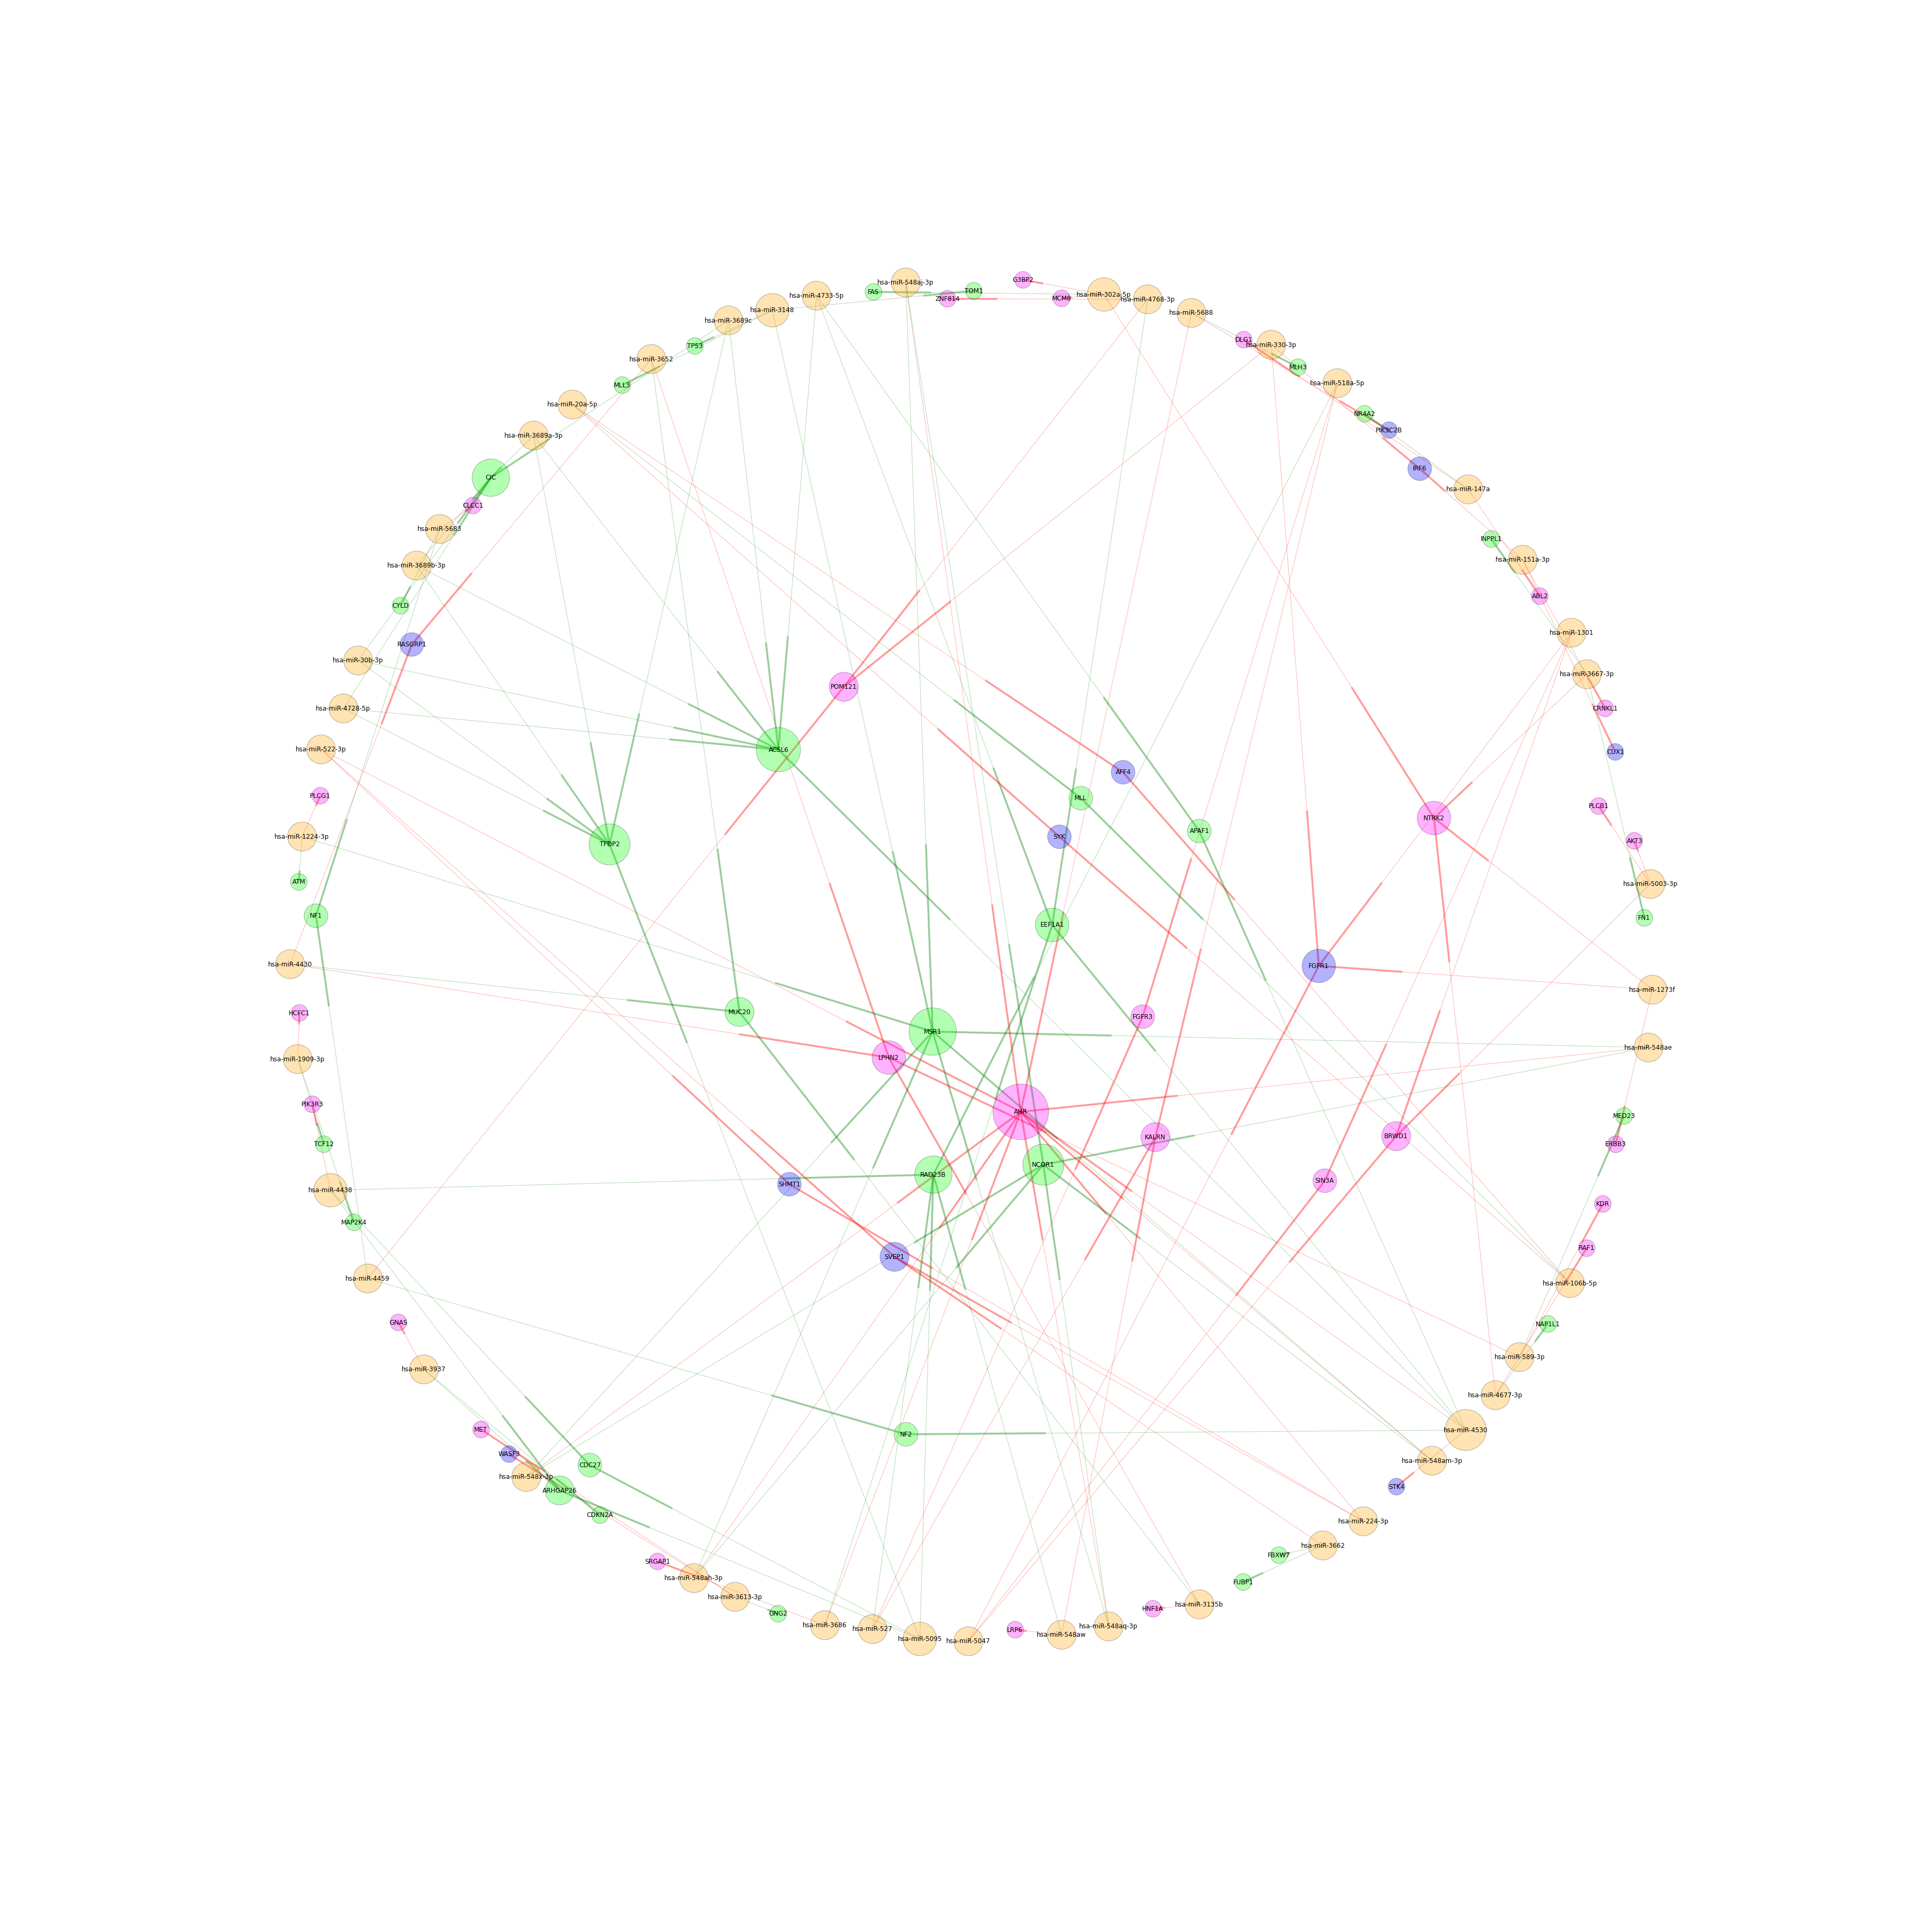

In [129]:
hey = 0
colors2 = []
colors=[]
mirs = []
size = []
for idx,row in dt4o.iterrows():
    if row["miRNA"] in mirs:
        continue
    mirs.append(row["miRNA"])
targets = []
for item in mirs:
    targets += G.neighbors(item)
fhb = t4o[t4o["miRNA"].isin(mirs)]
g = G.subgraph(mirs + targets)
for j,k in g.edges():
    test = []
    hey += 1
    print hey, '\r',
    for idx,row in fhb.iterrows():
        if not row["miRNA"] == j:
            continue
        if not row["Genesymbol"] == k:
            continue
        if row["Genesymbol"] in test:
            continue
        test.append(row["Genesymbol"])
        if row["Targetsiteclass"] == "Created":
            colors2.append("g")
        else:
            colors2.append("r")
for n in g.nodes():
    size.append(1000 * g.degree(n))
    if n in mirs:
        colors.append("orange")
    elif n in test1:
        colors.append("fuchsia")
    elif n in test2:
        colors.append("lime")
    else:
        colors.append("b")
figure(figsize=(50,50))
nx.draw(g, node_size = size, node_color=colors, alpha=.3, with_labels=True, edge_color=colors2)

In [99]:
test3

['FCRL4',
 'PIK3C2B',
 'RASGRP1',
 'SYNCRIP',
 'ACSL3',
 'AFF4',
 'SVEP1',
 'FGFR1',
 'PRKCZ',
 'CNOT4',
 'MAGI2',
 'MYD88',
 'FANCI',
 'EFTUD2',
 'SH2B3',
 'SHMT1',
 'PCSK5',
 'VIM',
 'CRTC3',
 'WHSC1',
 'SYK',
 'ARID4A',
 'WNK1',
 'JMY',
 'STK4',
 'FAM46C',
 'XRN1',
 'PIP5K1A',
 'CUX1',
 'IRF6',
 'WASF3',
 'TNPO1',
 'PTCH1',
 'CDC73',
 'RGS3',
 'SPOP',
 'MYC',
 'CAPN7',
 'FBXO11',
 'CDK4',
 'MED24',
 'SMURF2']

In [93]:
fhb

,Genesymbol,miRNA,Cancertype,Targetsiteclass


In [300]:
d1

{'hsa-let-7f-2-3p': ['NRAS'],
 'hsa-let-7i-3p': ['RAF1'],
 'hsa-miR-100-3p': [],
 'hsa-miR-101-3p': ['PLCG1'],
 'hsa-miR-103a-2-5p': ['POM121'],
 'hsa-miR-103a-3p': ['BRWD1'],
 'hsa-miR-105-5p': ['ARFGEF2'],
 'hsa-miR-106a-3p': ['EIF4G3'],
 'hsa-miR-106a-5p': [],
 'hsa-miR-106b-5p': [],
 'hsa-miR-107': ['BRWD1'],
 'hsa-miR-1178': [],
 'hsa-miR-1185-1-3p': ['NRAS'],
 'hsa-miR-1185-2-3p': ['NRAS'],
 'hsa-miR-1197': ['CLCC1', 'ERBB3'],
 'hsa-miR-1202': ['ABL2', 'TJP2'],
 'hsa-miR-1224-3p': ['PLCG1'],
 'hsa-miR-1226-3p': [],
 'hsa-miR-1227': ['ABL2'],
 'hsa-miR-1228-3p': [],
 'hsa-miR-1228-5p': ['NDRG1'],
 'hsa-miR-1244': [],
 'hsa-miR-1245a': ['FLT3'],
 'hsa-miR-1245b-3p': ['BPTF'],
 'hsa-miR-1246': ['BRWD1'],
 'hsa-miR-1247-5p': [],
 'hsa-miR-1249': ['AHR'],
 'hsa-miR-1252': [],
 'hsa-miR-1254': [],
 'hsa-miR-126-5p': ['CRNKL1'],
 'hsa-miR-1261': [],
 'hsa-miR-1263': [],
 'hsa-miR-1269a': ['NKX3-1'],
 'hsa-miR-1269b': ['NKX3-1'],
 'hsa-miR-1273f': ['NTRK2', 'ERBB3'],
 'hsa-miR-1273g-5p':

In [301]:
for key,val in d1.items():
    if d1[key] == []:
        del d1[key]

In [302]:
for key,val in d2.items():
    if d2[key] == []:
        del d2[key]

In [303]:
for key,val in d3.items():
    if d3[key] == []:
        del d3[key]

In [304]:
cd1 = {}
for key,val in d1.items():
    cd1[key] = len(val)

In [305]:
cd2 = {}
for key,val in d2.items():
    cd2[key] = len(val)

In [306]:
cd3 = {}
for key,val in d3.items():
    cd3[key] = len(val)

In [307]:
for key,val in d1.items():
    d1[key] = ",".join(val)

In [308]:
for key,val in d2.items():
    d2[key] = ",".join(val)

In [309]:
for key,val in d3.items():
    d3[key] = ",".join(val)

In [310]:
sd1 = pd.Series(d1)
dfd1 = pd.DataFrame(sd1)

In [311]:
sd2 = pd.Series(d2)
dfd2 = pd.DataFrame(sd2)

In [312]:
sd3 = pd.Series(d3)
dfd3 = pd.DataFrame(sd3)

In [313]:
fd = pd.concat([dfd1,dfd2,dfd3], axis=1)
fd

,0,0,0
hsa-let-7a-2-3p,NaN,FAS,NaN
hsa-let-7a-5p,NaN,"TBL1XR1,EEF1A1",NaN
hsa-let-7b-5p,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7c,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7d-5p,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7e-5p,NaN,"TBL1XR1,EEF1A1",NaN
hsa-let-7f-2-3p,NRAS,NaN,NaN
hsa-let-7f-5p,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7g-3p,NaN,FAS,NaN
hsa-let-7g-5p,NaN,"TBL1XR1,EEF1A1",NaN


In [314]:
fd.columns=["Driver Oncogenes with Disrupted Binding Site", "Driver Tumor Suppressor Gene with Created Binding Site", "Unclassified Driver Gene with Mutated Binding Site"]

In [315]:
fd

,Driver Oncogenes with Disrupted Binding Site,Driver Tumor Suppressor Gene with Created Binding Site,Unclassified Driver Gene with Mutated Binding Site
hsa-let-7a-2-3p,NaN,FAS,NaN
hsa-let-7a-5p,NaN,"TBL1XR1,EEF1A1",NaN
hsa-let-7b-5p,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7c,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7d-5p,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7e-5p,NaN,"TBL1XR1,EEF1A1",NaN
hsa-let-7f-2-3p,NRAS,NaN,NaN
hsa-let-7f-5p,NaN,"EEF1A1,TBL1XR1",NaN
hsa-let-7g-3p,NaN,FAS,NaN
hsa-let-7g-5p,NaN,"TBL1XR1,EEF1A1",NaN


In [316]:
fd = fd.fillna("")

In [317]:
td = {}
for idx,row in fd.iterrows():
    a = "t"
    b = "t"
    c = "t"
    if row["Driver Oncogenes with Disrupted Binding Site"] == "":
        a = 0
    if row["Driver Tumor Suppressor Gene with Created Binding Site"] == "":
        b = 0
    if row["Unclassified Driver Gene with Mutated Binding Site"] == "":
        c = 0
    if a == "t":
        a = len(row["Driver Oncogenes with Disrupted Binding Site"].split(","))
    if b == "t":
        b = len(row["Driver Tumor Suppressor Gene with Created Binding Site"].split(","))
    if c == "t":
        c = len(row["Unclassified Driver Gene with Mutated Binding Site"].split(","))
    td[idx] = a+b+c


In [318]:
td

{'hsa-let-7a-2-3p': 1,
 'hsa-let-7a-5p': 2,
 'hsa-let-7b-5p': 2,
 'hsa-let-7c': 2,
 'hsa-let-7d-5p': 2,
 'hsa-let-7e-5p': 2,
 'hsa-let-7f-2-3p': 1,
 'hsa-let-7f-5p': 2,
 'hsa-let-7g-3p': 1,
 'hsa-let-7g-5p': 2,
 'hsa-let-7i-3p': 2,
 'hsa-let-7i-5p': 2,
 'hsa-miR-101-3p': 1,
 'hsa-miR-103a-2-5p': 1,
 'hsa-miR-103a-3p': 1,
 'hsa-miR-105-5p': 2,
 'hsa-miR-106a-3p': 2,
 'hsa-miR-106a-5p': 2,
 'hsa-miR-106b-5p': 3,
 'hsa-miR-107': 1,
 'hsa-miR-10a-5p': 1,
 'hsa-miR-10b-3p': 2,
 'hsa-miR-10b-5p': 1,
 'hsa-miR-1178': 1,
 'hsa-miR-1181': 1,
 'hsa-miR-1183': 2,
 'hsa-miR-1184': 2,
 'hsa-miR-1185-1-3p': 1,
 'hsa-miR-1185-2-3p': 1,
 'hsa-miR-1197': 2,
 'hsa-miR-1200': 2,
 'hsa-miR-1202': 2,
 'hsa-miR-1204': 1,
 'hsa-miR-1206': 1,
 'hsa-miR-1207-5p': 1,
 'hsa-miR-1208': 1,
 'hsa-miR-122-5p': 1,
 'hsa-miR-1224-3p': 3,
 'hsa-miR-1226-3p': 1,
 'hsa-miR-1227': 1,
 'hsa-miR-1228-5p': 1,
 'hsa-miR-1245a': 1,
 'hsa-miR-1245b-3p': 1,
 'hsa-miR-1246': 1,
 'hsa-miR-1249': 1,
 'hsa-miR-1251': 1,
 'hsa-miR-12

In [319]:
td1 = pd.Series(td)
dftd = pd.DataFrame(td1)

In [320]:
fd = pd.concat([fd,dftd], axis=1)

In [321]:
fd

,Driver Oncogenes with Disrupted Binding Site,Driver Tumor Suppressor Gene with Created Binding Site,Unclassified Driver Gene with Mutated Binding Site,0
hsa-let-7a-2-3p,,FAS,,1
hsa-let-7a-5p,,"TBL1XR1,EEF1A1",,2
hsa-let-7b-5p,,"EEF1A1,TBL1XR1",,2
hsa-let-7c,,"EEF1A1,TBL1XR1",,2
hsa-let-7d-5p,,"EEF1A1,TBL1XR1",,2
hsa-let-7e-5p,,"TBL1XR1,EEF1A1",,2
hsa-let-7f-2-3p,NRAS,,,1
hsa-let-7f-5p,,"EEF1A1,TBL1XR1",,2
hsa-let-7g-3p,,FAS,,1
hsa-let-7g-5p,,"TBL1XR1,EEF1A1",,2


In [324]:
fd = fd.rename(columns={0:"Total # Mutated Driver Gene Binding Sites"})

In [325]:
fd

,Driver Oncogenes with Disrupted Binding Site,Driver Tumor Suppressor Gene with Created Binding Site,Unclassified Driver Gene with Mutated Binding Site,Total # Mutated Driver Gene Binding Sites
hsa-let-7a-2-3p,,FAS,,1
hsa-let-7a-5p,,"TBL1XR1,EEF1A1",,2
hsa-let-7b-5p,,"EEF1A1,TBL1XR1",,2
hsa-let-7c,,"EEF1A1,TBL1XR1",,2
hsa-let-7d-5p,,"EEF1A1,TBL1XR1",,2
hsa-let-7e-5p,,"TBL1XR1,EEF1A1",,2
hsa-let-7f-2-3p,NRAS,,,1
hsa-let-7f-5p,,"EEF1A1,TBL1XR1",,2
hsa-let-7g-3p,,FAS,,1
hsa-let-7g-5p,,"TBL1XR1,EEF1A1",,2


In [327]:
fd.to_csv("driver_gene_counts.txt", sep="\t")